In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from statistics import mean
from sklearn.metrics import roc_curve,auc

Programming Problem 1

In [6]:
f = open("D2z.txt", "r")
first_dim = []
second_dim = []
prediction = []
for x in f:
  a, b, c = x.split(" ")
  first_dim.append(float(a))
  second_dim.append(float(b))
  prediction.append(float(c[:-1]))
zipped = list(zip(first_dim, second_dim, prediction))
df = pd.DataFrame(zipped, columns=['X', 'Y', 'Prediction'])
test = np.linspace(-2,2,41)
test_data = [(a, b) for a in test for b in test]
knn_model = KNeighborsClassifier(n_neighbors=1)
train_data = list(zip(df["X"], df["Y"]))
knn_model.fit(train_data, df["Prediction"])
testing_predict = knn_model.predict(test_data)

In [7]:
x = []
y = []
for point in test_data:
  x.append(point[0])
  y.append(point[1])
testing = list(zip(x,y, testing_predict))
test_df = pd.DataFrame(testing, columns=['X', 'Y', 'Prediction'])

In [8]:
split_train = ["Training"] * 200
split_test = ["Testing"] * 1681
split = split_train + split_test
X = list(df["X"]) + list(test_df["X"])
Y = list(df["Y"]) + list(test_df["Y"])
Prediction = list(df["Prediction"]) + list(test_df["Prediction"])
label = []
for i in range(len(Prediction)):
  if i < 200:
    label.append("Training" + str(int(Prediction[i])))
  else:
    label.append("Testing" + str(int(Prediction[i])))
total = list(zip(X, Y, Prediction, label))
total_df = pd.DataFrame(total, columns=['X', 'Y', 'Prediction', "Label"])

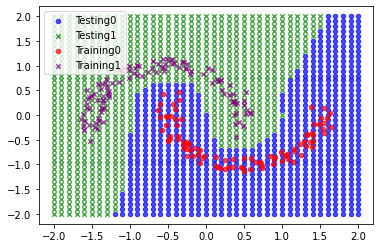

In [9]:
fig = category_scatter(x='X', y='Y', label_col= 'Label', 
                       data=total_df, legend_loc='upper left', markers = "ox")

Programming Problem 2

In [10]:
emails = pd.read_csv("emails.csv")
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [11]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

clf =  KNeighborsClassifier(n_neighbors=1)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

print(cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy"))
print(cross_val_score(clf, X, y, cv = k_folds, scoring = "precision"))
print(cross_val_score(clf, X, y, cv = k_folds, scoring = "recall"))

[0.825 0.853 0.862 0.851 0.775]
[0.65449438 0.68571429 0.72121212 0.71641791 0.60574413]
[0.81754386 0.86642599 0.83802817 0.81632653 0.75816993]


Programming Problem 3

In [59]:
#Logistic Regression

#Train and Test Split
X_train = emails.drop(columns=["Email No.", "Prediction"])[:4000]
y_train = emails["Prediction"][:4000]

X_test = emails.drop(columns=["Email No.", "Prediction"])[4000:5000]
y_test = emails["Prediction"][4000:5000]


#Sigmoid Function
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def train_logistic(x, y,learning_rate,iterations,weight, bias): 
    n_features = x.shape[0]
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))
        weights_GD = 1/n_features * np.dot(x.T, (sigma - y))
        bias_GD = 1/n_features * np.sum(sigma - y)
        weight -= learning_rate * weights_GD
        bias -= learning_rate * bias_GD
    
    return weight, bias

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values) >= 1/2 #Cut Off at 50%

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


In [98]:
def validation_scores (orig, pred):
  accuracy = 0
  precision = 0
  prec_denom = 0
  recall = 0
  recall_denom = 0
  orig_list = list(orig)
  for prediction, original in zip(pred, orig_list):
    if prediction == True and original == 1:
      accuracy += 1
      precision += 1
      recall += 1
      recall_denom += 1
      prec_denom += 1
    elif prediction == False and original == 0:
      accuracy += 1
    elif prediction == True and original == 0:
      prec_denom += 1
    elif prediction == False and original == 1:
      recall_denom += 1

  accuracy = accuracy / len(orig_list)
  precision = precision / prec_denom
  recall = recall / recall_denom
  return accuracy, precision, recall

In [64]:
validation_scores(predictions, y_test) #Fold 5

(0.822, 0.7843137254901961, 0.6818181818181818)

In [71]:
X_train = emails.drop(columns=["Email No.", "Prediction"])[1000:5000]
y_train = emails["Prediction"][1000:5000]

X_test = emails.drop(columns=["Email No.", "Prediction"])[:1000]
y_test = emails["Prediction"][:1000]

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values) >= 1/2 #Cut Off at 50%
validation_scores(predictions, y_test) #Fold 1

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


(0.723, 0.9298245614035088, 0.5076628352490421)

In [100]:
X_train = emails.drop(columns=["Email No.", "Prediction"], index = emails.index[3000:4000])
y_train = emails["Prediction"].drop(emails.index[3000:4000])

X_test = emails.drop(columns=["Email No.", "Prediction"])[3000:4000]
y_test = emails["Prediction"][3000:4000]

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values) >= 1/2 #Cut Off at 50%
validation_scores(predictions, y_test)

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


(0.747, 0.14285714285714285, 0.9767441860465116)

In [101]:
X_train = emails.drop(columns=["Email No.", "Prediction"], index = emails.index[1000:2000])
y_train = emails["Prediction"].drop(emails.index[1000:2000])

X_test = emails.drop(columns=["Email No.", "Prediction"])[1000:2000]
y_test = emails["Prediction"][1000:2000]

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values) >= 1/2 #Cut Off at 50%
validation_scores(predictions, y_test)

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


(0.783, 0.2527075812274368, 0.875)

In [102]:
X_train = emails.drop(columns=["Email No.", "Prediction"], index = emails.index[2000:3000])
y_train = emails["Prediction"].drop(emails.index[2000:3000])

X_test = emails.drop(columns=["Email No.", "Prediction"])[2000:3000]
y_test = emails["Prediction"][2000:3000]

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values) >= 1/2 #Cut Off at 50%
validation_scores(predictions, y_test)

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


(0.864, 0.5985915492957746, 0.8854166666666666)

Programming Problem 4

In [12]:
clf =  KNeighborsClassifier(n_neighbors=1)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

scores_1 = cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy")

clf =  KNeighborsClassifier(n_neighbors=3)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

scores_3 = cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy")

clf =  KNeighborsClassifier(n_neighbors=5)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

scores_5 = cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy")

clf =  KNeighborsClassifier(n_neighbors=7)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

scores_7 = cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy")

clf =  KNeighborsClassifier(n_neighbors=10)

k_folds = KFold(n_splits = 5)

y = emails["Prediction"]
X = emails.drop(columns=["Email No.", "Prediction"])

scores_9 = cross_val_score(clf, X, y, cv = k_folds, scoring = "accuracy")

In [13]:
num_neighbor = [1,3,5,7,10]
avg_accuracy = [mean(scores_1), mean(scores_3), mean(scores_5), mean(scores_7), mean(scores_9)]
print(avg_accuracy)

[0.8331999999999999, 0.8422, 0.8408, 0.8462, 0.8556]


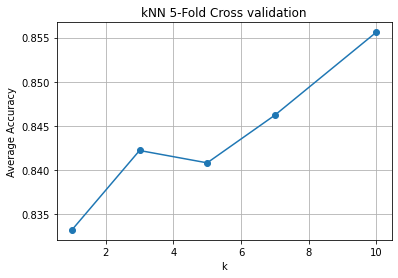

In [14]:
plt.plot(num_neighbor, avg_accuracy, marker = "o")
plt.grid()
plt.title('kNN 5-Fold Cross validation')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.show()

Programming Problem 5

In [105]:
#KNN
X_train = emails.drop(columns=["Email No.", "Prediction"])[:4000]
y_train = emails["Prediction"][:4000]

X_test = emails.drop(columns=["Email No.", "Prediction"])[4000:5000]
y_test = emails["Prediction"][4000:5000]

knn =  KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_pred_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc=auc(fpr,tpr)
print(roc_auc)

0.846393456518054


In [103]:
#Logistic Regression
X_train = emails.drop(columns=["Email No.", "Prediction"])[:4000]
y_train = emails["Prediction"][:4000]

X_test = emails.drop(columns=["Email No.", "Prediction"])[4000:5000]
y_test = emails["Prediction"][4000:5000]

weight_begin = np.zeros(X_train.shape[1])
bias_begin = 0

weight, bias = train_logistic(X_train, y_train, learning_rate = 0.01, iterations = 500, weight = weight_begin, bias = bias_begin)

prediction_values = np.dot(X_test, weight) + bias
predictions = sigmoid(prediction_values)

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, predictions)

roc_auc_log = auc(fpr_log,tpr_log)
print(roc_auc_log)

<ipython-input-59-5a8d4ff8be7b>:20: RuntimeWarning: divide by zero encountered in log
  loss = -1 *((y * np.log(sigma)) + ((1 - y) * np.log(1-sigma)))


0.8906170537379217


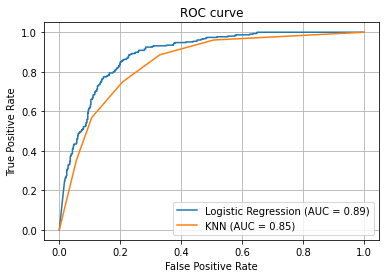

In [106]:
plt.plot(fpr_log,tpr_log, label='Logistic Regression (AUC = 0.89)') #Replace with Logistic Variables
plt.plot(fpr,tpr, label='KNN (AUC = 0.85)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()